<a href="https://colab.research.google.com/github/FilipeLima/Intro-Pandas/blob/main/Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pacote Google Drive

In [10]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:

clothes = pd.read_csv("./drive/MyDrive/final_test.csv")
clothes.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [ ]:
clothes.describe()

In [12]:
notas = pd.read_csv("./drive/MyDrive/notas.csv")
notas.head()

,Unnamed: 0,Nome,1VA,2VA,3VA,MEDIA,VAFN,MFIN,SIT,FALTAS,ANO,SEMESTRE,TURMA,PROFESSOR,UNIDADE,DISCIPLINA
0,1,AILTON BARBOSA RODRIGUES,3,F,F,NaN,NaN,NaN,RF,0,2018,1,LQ1,FILIPE,UAST,Matemática Básica
1,2,ALANE FELIZARDO VANDERLEI,"0,5","2,4",1,"1,7",NaN,"1,7",RP,8,2018,1,LQ1,FILIPE,UAST,Matemática Básica
2,3,ALINE ALVES DA SILVA,7,10,NaN,"8,5",NaN,"8,5",AM,0,2018,1,LQ1,FILIPE,UAST,Matemática Básica
3,4,AUGUSTO FRANCISCO DE FREITAS RAMALHO,F,F,NaN,NaN,NaN,NaN,RF,22,2018,1,LQ1,FILIPE,UAST,Matemática Básica
4,5,CAIO JOSE DA SILVA CAMPOS,10,"9,5",NaN,"9,75",NaN,"9,75",AM,0,2018,1,LQ1,FILIPE,UAST,Matemática Básica


Informações básicas

In [ ]:
notas.shape

(392, 16)

In [ ]:
notas.columns

Index(['Unnamed: 0', 'Nome', '1VA', '2VA', '3VA', 'MEDIA', 'VAFN', 'MFIN',
       'SIT', 'FALTAS', 'ANO', 'SEMESTRE', 'TURMA', 'PROFESSOR', 'UNIDADE',
       'DISCIPLINA'],
      dtype='object')

In [ ]:
notas.dtypes

Unnamed: 0     int64
Nome          object
1VA           object
2VA           object
3VA           object
MEDIA         object
VAFN          object
MFIN          object
SIT           object
FALTAS         int64
ANO            int64
SEMESTRE       int64
TURMA         object
PROFESSOR     object
UNIDADE       object
DISCIPLINA    object
dtype: object

In [ ]:
notas['ANO'].unique()

array([2018, 2017, 2016])

In [ ]:
print(pd.isnull(notas['3VA']))

0      False
1      False
2       True
3       True
4       True
       ...  
387    False
388     True
389    False
390     True
391     True
Name: 3VA, Length: 392, dtype: bool


In [ ]:
pd.isnull(notas['3VA']).sum()

222

In [ ]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  392 non-null    int64 
 1   Nome        392 non-null    object
 2   1VA         392 non-null    object
 3   2VA         392 non-null    object
 4   3VA         170 non-null    object
 5   MEDIA       313 non-null    object
 6   VAFN        69 non-null     object
 7   MFIN        313 non-null    object
 8   SIT         392 non-null    object
 9   FALTAS      392 non-null    int64 
 10  ANO         392 non-null    int64 
 11  SEMESTRE    392 non-null    int64 
 12  TURMA       392 non-null    object
 13  PROFESSOR   392 non-null    object
 14  UNIDADE     392 non-null    object
 15  DISCIPLINA  392 non-null    object
dtypes: int64(4), object(12)
memory usage: 49.1+ KB


In [ ]:
notas.iloc[100:110,3:6]

,2VA,3VA,MEDIA
100,F,NaN,NaN
101,"3,5",F,"2,25"
102,10,NaN,10
103,F,F,NaN
104,6,NaN,8
105,F,NaN,NaN
106,10,NaN,10
107,2,10,"9,75"
108,10,NaN,10
109,2,5,"6,5"


In [ ]:
notas.loc[120:130,["2VA","3VA","PROFESSOR"]]

,2VA,3VA,PROFESSOR
120,10,NaN,FILIPE
121,8,NaN,FILIPE
122,F,NaN,FILIPE
123,4,10,FILIPE
124,F,3,FILIPE
125,10,NaN,FILIPE
126,9,NaN,FILIPE
127,F,NaN,FILIPE
128,9,NaN,FILIPE
129,10,NaN,FILIPE


Visualização

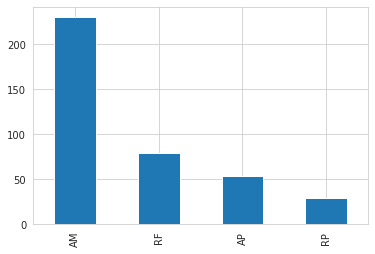

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
notas["SIT"].value_counts().plot(kind='bar')

In [24]:
#pd.isnull(pd.to_numeric(notas['1VA'],errors='coerce')).sum()
pd.to_numeric(notas['1VA'],errors='coerce')

0       3.0
1       NaN
2       7.0
3       NaN
4      10.0
       ... 
387     NaN
388     NaN
389    10.0
390    10.0
391    10.0
Name: 1VA, Length: 392, dtype: float64

In [28]:
pd.isnull(pd.to_numeric(notas['MFIN'],errors='coerce')).sum()

265

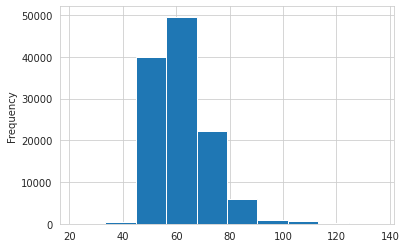

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
clothes["weight"].plot(kind='hist')

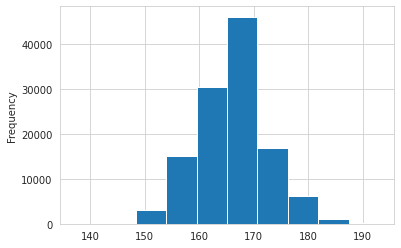

In [ ]:
clothes["height"].plot(kind='hist')

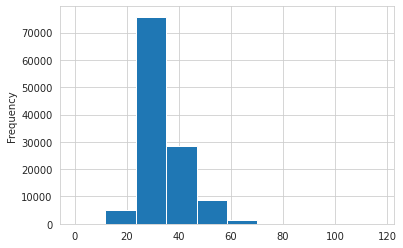

In [ ]:
clothes["age"].plot(kind='hist')

In [ ]:
clothes['size'].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

Preciso modificar para numeração BR.

Banco de dados da OCDE (https://data.oecd.org/agroutput/crop-production.htm) https://www.kaggle.com/vagifa/worldwide-crop-production

In [ ]:
crop = pd.read_csv("./drive/MyDrive/worldwide_crop_consumption.csv")
crop.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,RICE,TONNE_HA,1990,5.374114
1,AUS,RICE,TONNE_HA,1991,5.897753
2,AUS,RICE,TONNE_HA,1992,5.903150
3,AUS,RICE,TONNE_HA,1993,5.221311
4,AUS,RICE,TONNE_HA,1994,5.457576


In [ ]:
crop['MEASURE'].unique()

array(['TONNE_HA', 'THND_TONNE', 'THND_HA'], dtype=object)

In [ ]:
crop['LOCATION'].unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'DZA',
       'ARG', 'BGD', 'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'GHA',
       'IND', 'IDN', 'IRN', 'KAZ', 'MYS', 'MOZ', 'NGA', 'PAK', 'PRY',
       'PER', 'PHL', 'RUS', 'SAU', 'ZAF', 'SDN', 'TZA', 'THA', 'UKR',
       'URY', 'VNM', 'ZMB', 'WLD', 'SSA', 'OECD', 'BRICS', 'NOR', 'CHE',
       'EU28', 'ISR', 'HTI'], dtype=object)

In [ ]:
crop['SUBJECT'].unique()

array(['RICE', 'WHEAT', 'MAIZE', 'SOYBEAN'], dtype=object)

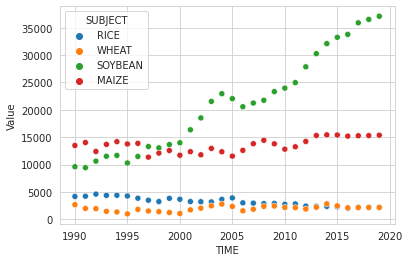

In [ ]:
#cropBrazil= crop.query("LOCATION == 'BRA' & SUBJECT == 'SOYBEAN' & MEASURE =='THND_HA' ")
cropBrazil= crop.query("LOCATION == 'BRA' & MEASURE =='THND_HA' & TIME <2020 ")

#cropBrazilSelect = cropBrazil[["TIME","Value"]]

cropBrazilSelect = cropBrazil[["TIME","Value","SUBJECT"]]
cropBrazilSelect.head()
sns.scatterplot(x="TIME", y="Value", data = cropBrazilSelect, hue="SUBJECT")